Joao Quinta

## TP 2

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

### EX 1

#### .1

(a)  
  
$\mu_X = E[X] = E[A+4B] = E[A] + 4E[B] = 0$  
$\mu_Y = E[Y] = E[2A+B] = 2E[A] + E[B] = 0$  
$\sigma_X = \sqrt{Var(X)} = \sqrt{Var(A+4B)} = \sqrt{Var(A) + 4^2Var(B) + 2Cov(A,B)} = \sqrt{1+16*2^2+2*0} = \sqrt{65}$  
$\sigma_Y = \sqrt{Var(Y)} = \sqrt{Var(2A+B)} = \sqrt{2^2Var(A) + Var(B) + 2Cov(A,B)} = \sqrt{4*1+2^2+2*0} = \sqrt{8}$  
  
  
(b)  
  
$Cov(X,Y) = E[(X-\mu_X)(Y-\mu_Y)] = E[XY]-E[X]E[Y] = E[(A+4B)(2A+B)] - \mu_X\mu_Y = E[2A^2+AB+8AB+4B^2] - \mu_X\mu_Y = 2E[A^2] + 9E[A]E[B] + 4E[B^2] - \mu_X\mu_Y = 2*1^2+0+4*2^2-0 = 18$  
  
  
(c)  
$Cor(X,Y) = \frac{Cov(X,Y)}{\sigma_X\sigma_Y} = \frac{18}{\sqrt{65}\sqrt{8}}$

#### .2

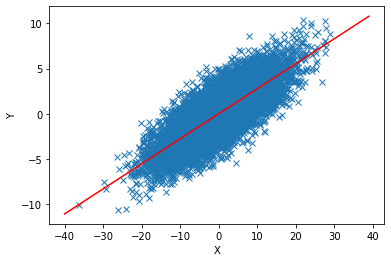

In [23]:
# a
np.random.seed(0)

n = 10000
mu_a, sig_a = 0, 1
mu_b, sig_b = 0, 2
a = np.random.normal(mu_a, sig_a, n)
b = np.random.normal(mu_b, sig_b, n)
x = a + 4 * b
y = 2 * a + b

plt.figure()
plt.plot(x,y,"x")
plt.xlabel("X")
plt.ylabel("Y")

x_ = np.arange(-40,40,1)
y_ = x_ * 18/65
plt.plot(x_,y_,"r")
plt.show()

b  
  
slope = $Cor(X,Y) \cdot \frac{\sigma_Y}{\sigma_X} = \frac{Cov(X,Y)}{\sigma_X\sigma_Y} \cdot \frac{\sigma_Y}{\sigma_X} = \frac{Cov(X,Y)}{\sigma_X^2}$  
  
--> slope = $\frac{18}{65} ~= 0.2769$  
  
--> correlation coefficient = $\frac{18}{\sqrt{8}\sqrt{65}} ~= 0.7894$  
  
slope and correlation coefficient are different!

In [24]:
# c 

cor_analytical = 18/(np.sqrt(8)*np.sqrt(65))
cor_empirical = np.corrcoef(x,y).tolist()[0][1]

print("Analytical derivation corr --> ", cor_analytical)
print("Empirical corr --> ", cor_empirical)

Analytical derivation corr -->  0.7893522173763263
Empirical corr -->  0.7883387100133818


### EX 2

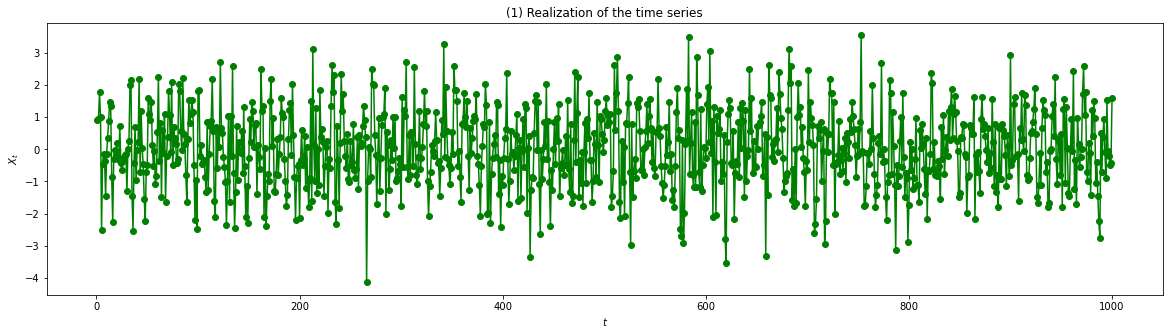

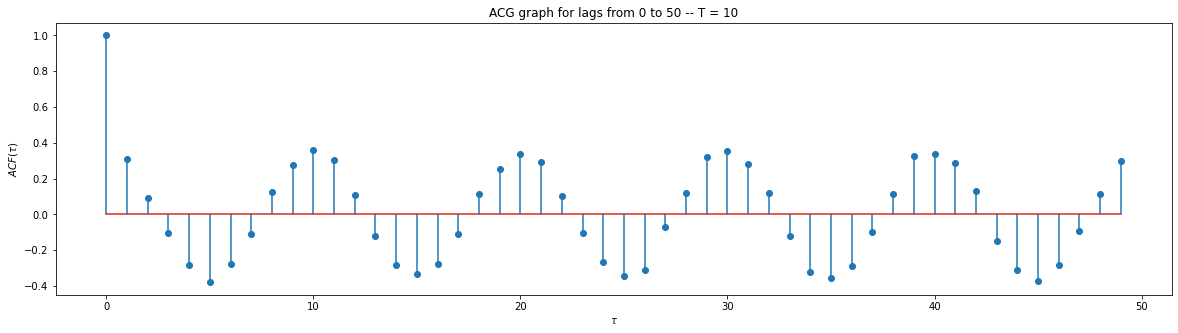

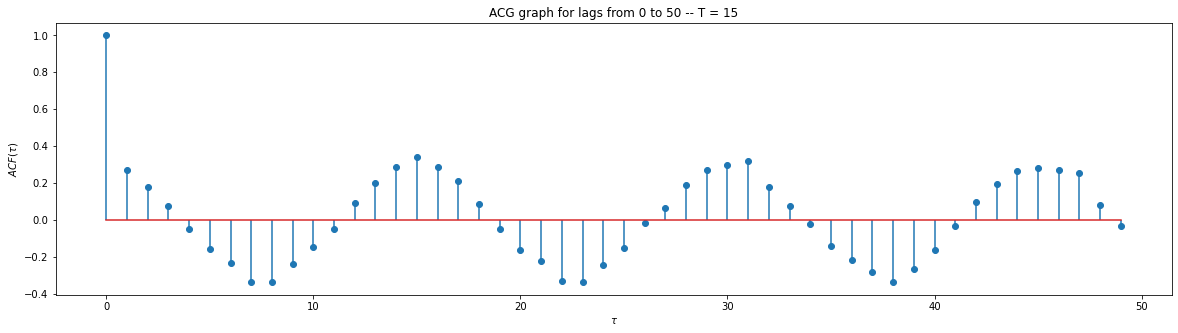

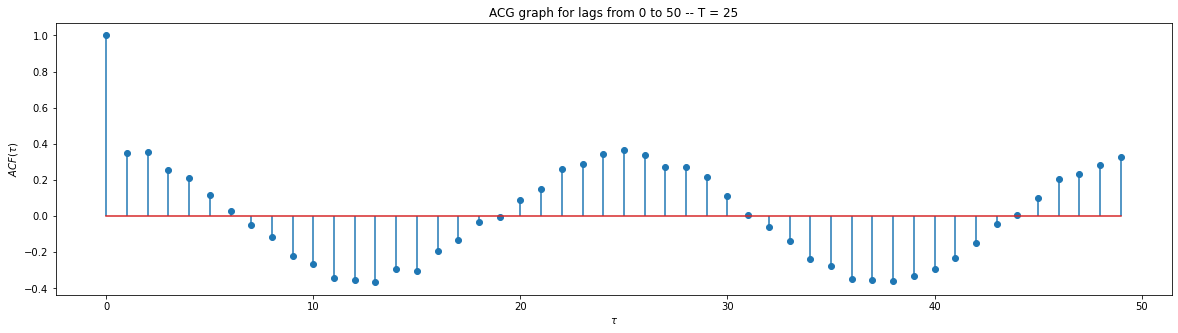

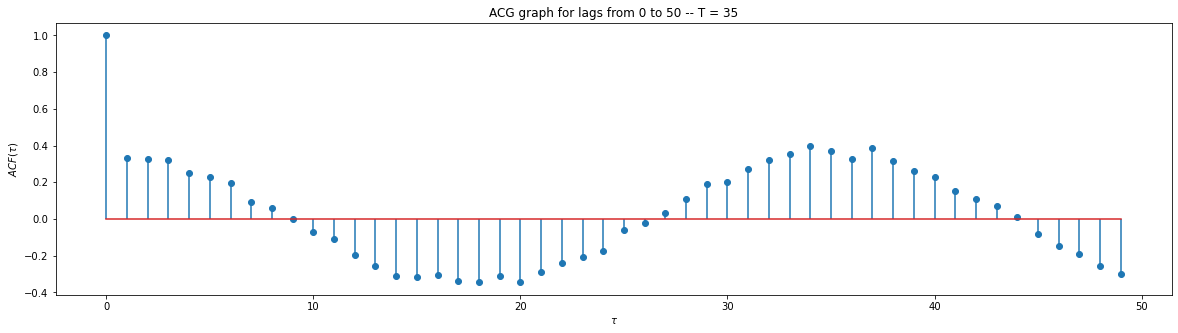

In [25]:
# acf function for .2 and .3

def acf(x, lag):
    series_lagged = np.roll(x, -lag)
    series_lagged[(len(x)-lag):] = 0
    res = np.sum(np.multiply(x, series_lagged)) / (len(x)-lag)
    res = res / (np.std(x)*np.std(x))
    return res

def plot_(T):
    n = 1000

    noise = np.random.normal(0,1, n)
    time = np.arange(1, 1001)

    series = np.sin(2 * np.pi * time / T) + noise

    acf_0_50 = []
    for i in range(50):
        acf_0_50.append(acf(series, i))

    fig, ax = plt.subplots(figsize=(20,5))
    ax.stem(range(50), acf_0_50)
    plt.xlabel(r"$\tau$")
    plt.ylabel(r"$ACF(\tau)$")
    plt.title("ACG graph for lags from 0 to 50 -- T = " + str(T))
    plt.show()

# 1

n = 1000
T = 10

noise = np.random.normal(0,1, n)
time = np.arange(1, 1001)

series = np.sin(2 * np.pi * time / T) + noise

plt.figure(figsize=(20,5))
plt.plot(time,series, "-og")
plt.xlabel(r"$t$")
plt.ylabel(r"$X_t$")
plt.title("(1) Realization of the time series")
plt.show()

# 2 

plot_(10)

# 3

plot_(15)
plot_(25)
plot_(35)

--> by computing ACF for multiple values of period T, we find the correct value, which is 10

### EX 3

#### .1

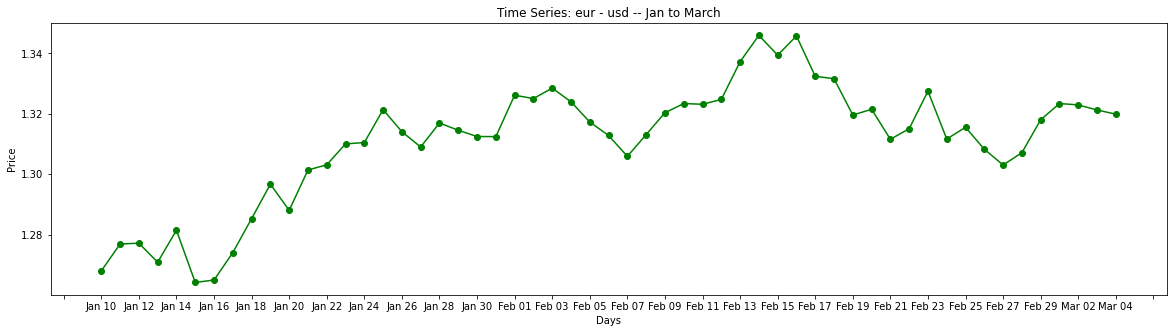

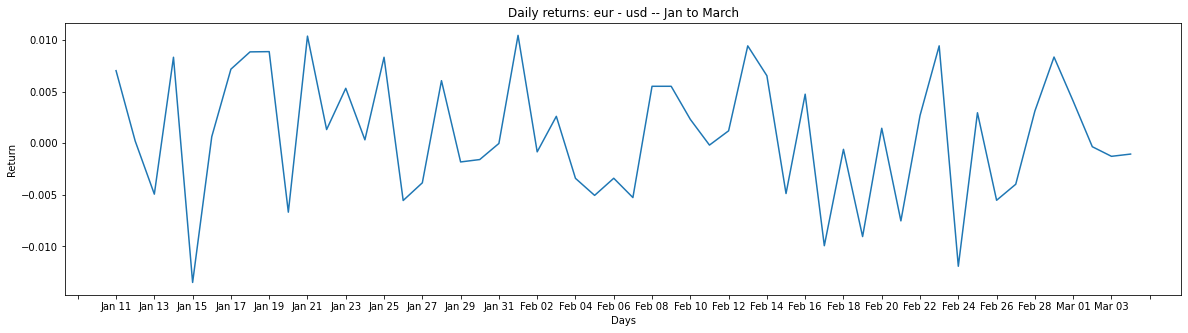

In [26]:
# return function 

def daily_return(series):
    return [(series[i+1] - series[i])/series[i] for i in range(0, len(series)-1)]

# 1.a

data = np.loadtxt("eur_usd.txt")
prices_ts = data[:, 1]

#  Tip: You can convert the timestamp to a better format:
days = [datetime.fromtimestamp(x).strftime('%b %d') for x in data[:, 0]]

f, ax = plt.subplots(figsize=(20,5))
plt.plot(days,prices_ts, "-og")
plt.ylabel("Price")
plt.xlabel("Days")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.title("Time Series: eur - usd -- Jan to March")
plt.show()

# 1.b

daily_return_series = daily_return(prices_ts)

f, ax = plt.subplots(figsize=(20,5))
plt.plot(days[1:],daily_return_series)
plt.ylabel("Return")
plt.xlabel("Days")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.title("Daily returns: eur - usd -- Jan to March")
plt.show()

1.a -- The curve does not look stationary, from Jan to mid Feb, it seems to have an upwaards trend.  
  
1.b -- The returns do seem more stationary. The total variance is pretty much the same everywhere from Jan to Mar, and it is quite a small Variance

#### .2

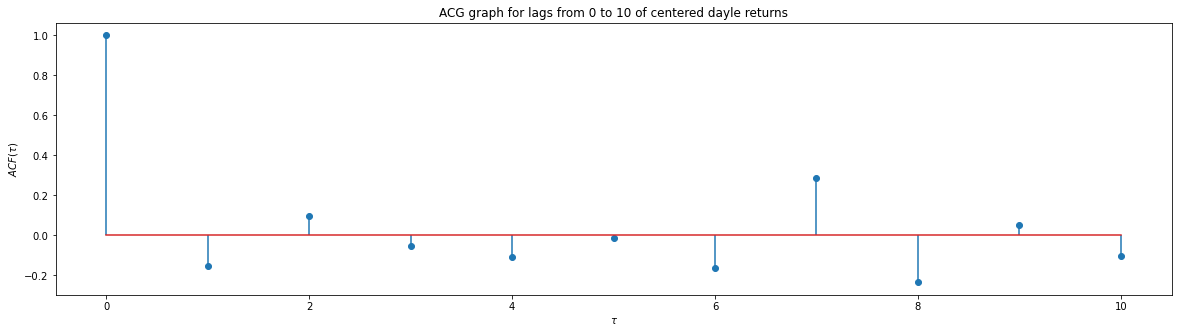

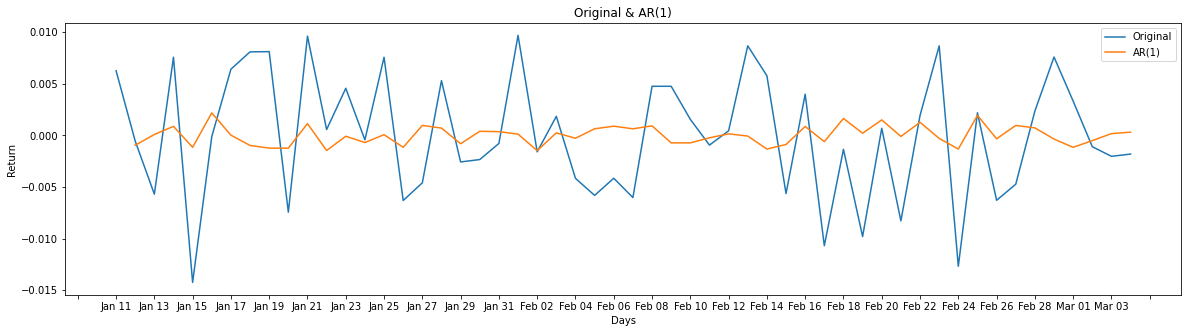

In [27]:
#function for 3.2.c

def ar1(series, c, phi):
    res = []

    for i in range(1, len(series)):
        tmp = c + phi * series[i-1]
        res.append(tmp)
    
    return res

# center the series

daily_return_series_ct = daily_return_series - np.mean(daily_return_series)

# 2.a

acf_0_10 = []

for i in range(11):
    acf_0_10.append(acf(daily_return_series_ct, i))


fig, ax = plt.subplots(figsize=(20,5))
ax.stem(range(11), acf_0_10)
plt.xlabel(r"$\tau$")
plt.ylabel(r"$ACF(\tau)$")
plt.title("ACG graph for lags from 0 to 10 of centered dayle returns")
plt.show()

# 2.b

phi_1 = acf(daily_return_series_ct, 1)


# 2.c

ar1_res = ar1(daily_return_series_ct, 0, phi_1)

f, ax = plt.subplots(figsize=(20,5))
plt.plot(days[1:],daily_return_series_ct, label="Original")
plt.plot(days[2:],ar1_res, label= "AR(1)")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Return")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.title("Original & AR(1)")
plt.show()

The predictions follow well the trend, however, they dont respect the amplitude. We might have to do it with more data.  
  
Also, compute AR(t) with t > 1

#### .3

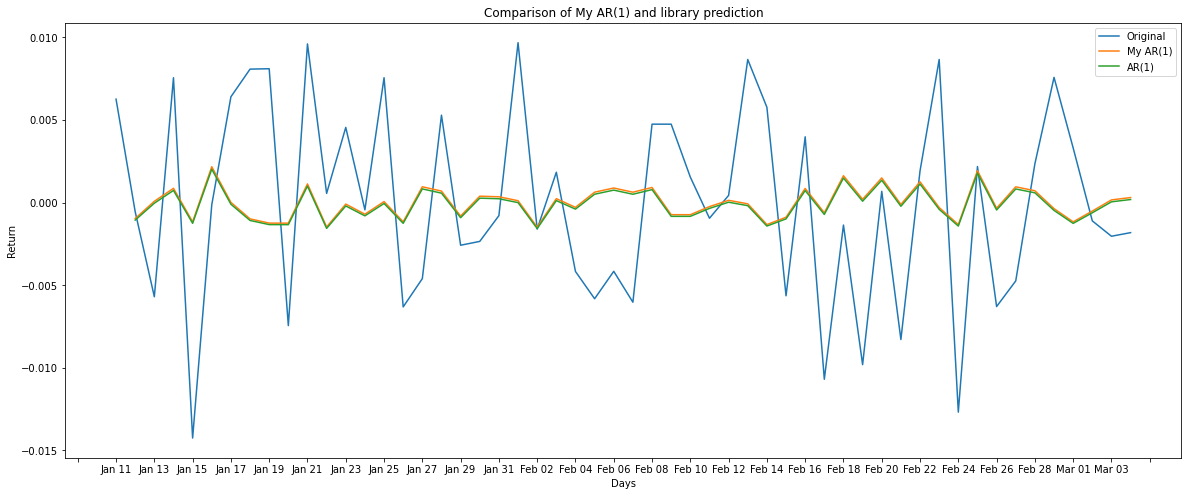

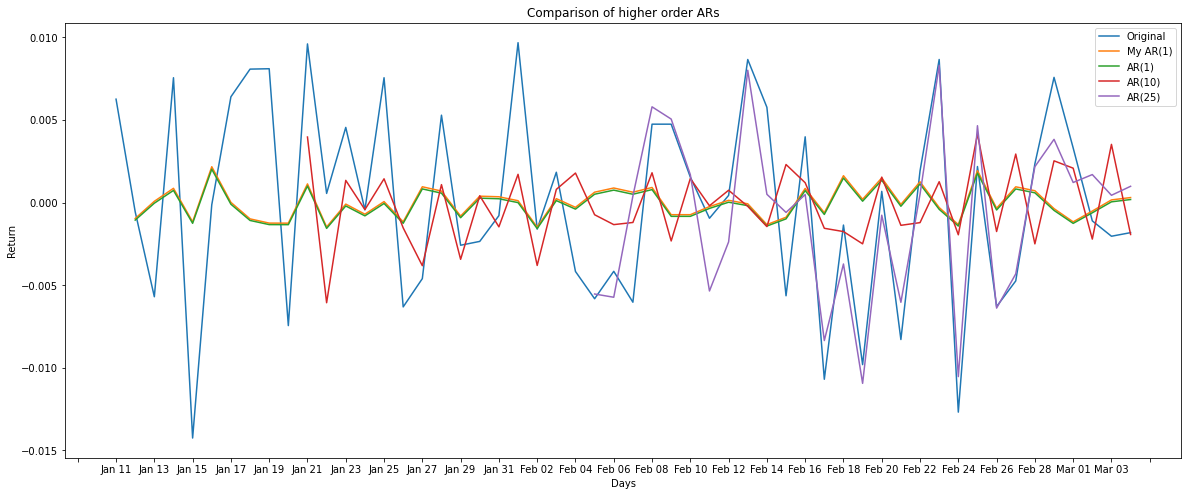

In [28]:
from statsmodels.tsa.ar_model import AutoReg

# a
predictions_1 = AutoReg(daily_return_series_ct, lags=1).fit().predict()[1:]


f, ax = plt.subplots(figsize=(20,8))
plt.plot(days[1:], daily_return_series_ct, label="Original")
plt.plot(days[2:], ar1_res, label= "My AR(1)")
plt.plot(days[2:], predictions_1, label= "AR(1)")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.legend()
plt.xlabel("Days")
plt.ylabel("Return")
plt.title("Comparison of My AR(1) and library prediction")
plt.show()

# b

predictions_10 = AutoReg(daily_return_series_ct, lags=10).fit().predict()[10:]
predictions_25 = AutoReg(daily_return_series_ct, lags=25).fit().predict()[25:]

f, ax = plt.subplots(figsize=(20,8))
plt.plot(days[1:], daily_return_series_ct, label="Original")
plt.plot(days[2:], ar1_res, label= "My AR(1)")
plt.plot(days[2:], predictions_1, label= "AR(1)")
plt.plot(days[11:], predictions_10, label= "AR(10)")
plt.plot(days[26:], predictions_25, label= "AR(25)")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.legend()
plt.xlabel("Days")
plt.ylabel("Return")
plt.title("Comparison of higher order ARs")
plt.show()

YEs, having a larger t gives us better predictions, however it is at the expense of having a larger lag!